<a href="https://colab.research.google.com/github/user1896/Neural-Network-image-classification/blob/main/LeNet-5/LeNet_5_train_and_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet-5 MODEL

In [ ]:
from __future__ import print_function
import json
import keras
import pickle
import os.path
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras import optimizers
from keras import regularizers
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input
from keras.layers import add
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load DataSet

In [ ]:
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

# Prepare Pixel Data

In [ ]:
#We know that the pixel values for each image in the dataset are unsigned integers in the range
#between black and white, or 0 and 255. We do not know the best way to scale the pixel values
#for modeling, but we know that some scaling will be required. A good starting point is to
#normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves
#first converting the data type from unsigned integers to floats, then dividing the pixel values by
#the maximum value.
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype( 'float32' )
  test_norm = test.astype( 'float32' )
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

# Define The Model

In [ ]:
# define cnn model
def define_model():
  model = Sequential()

  model.add(Conv2D(6, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' , input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(16, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' , padding= 'same' ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))

  model.add(Flatten())

  model.add(Dense(120, activation= 'relu' , kernel_initializer= 'he_uniform' ))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Dense(84, activation= 'relu' , kernel_initializer= 'he_uniform' ))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(10, activation= 'softmax' ))

  # compile model
  # opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer='adam', loss= 'categorical_crossentropy' , metrics=[ 'accuracy' ])
  return model

In [ ]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         168       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 6)        24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        880       
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 16)       6

# Model Architecture

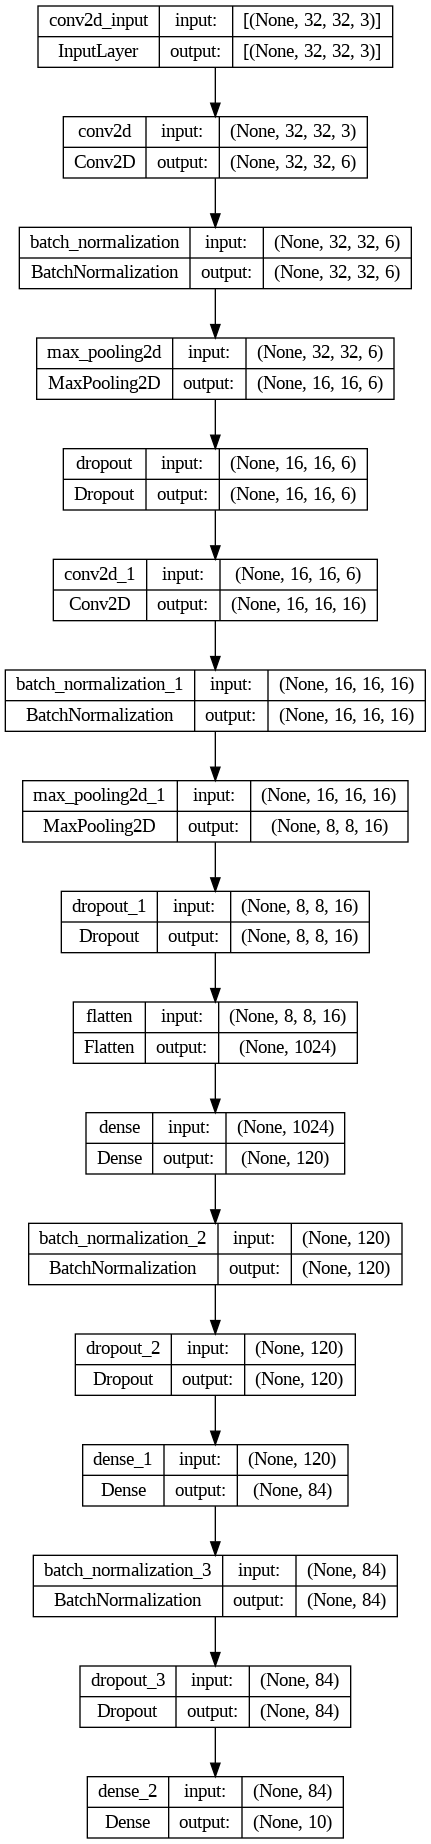

In [ ]:
# plot model architecture
plot_model(model, show_shapes=True, to_file= 'lenet_block.png' )

# Data Augmentation

In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)

# Train The Model

In [ ]:
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=70, validation_data=(testX,
testY), verbose=1)

Epoch 1/70


<ipython-input-9-c29c10b94f9a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=70, validation_data=(testX,


781/781 [==============================] - 102s 128ms/step - loss: 2.0633 - accuracy: 0.2880 - val_loss: 1.5668 - val_accuracy: 0.4303
Epoch 2/70
781/781 [==============================] - 95s 122ms/step - loss: 1.6861 - accuracy: 0.3899 - val_loss: 1.4519 - val_accuracy: 0.4727
Epoch 3/70
781/781 [==============================] - 97s 125ms/step - loss: 1.5976 - accuracy: 0.4231 - val_loss: 1.5396 - val_accuracy: 0.4393
Epoch 4/70
781/781 [==============================] - 94s 120ms/step - loss: 1.5302 - accuracy: 0.4499 - val_loss: 1.3490 - val_accuracy: 0.5032
Epoch 5/70
781/781 [==============================] - 95s 122ms/step - loss: 1.4886 - accuracy: 0.4640 - val_loss: 1.2894 - val_accuracy: 0.5296
Epoch 6/70
781/781 [==============================] - 100s 128ms/step - loss: 1.4487 - accuracy: 0.4791 - val_loss: 1.3084 - val_accuracy: 0.5184
Epoch 7/70
781/781 [==============================] - 109s 139ms/step - loss: 1.4259 - accuracy: 0.4901 - val_loss: 1.3200 - val_accuracy: 

# Evaluate The Model

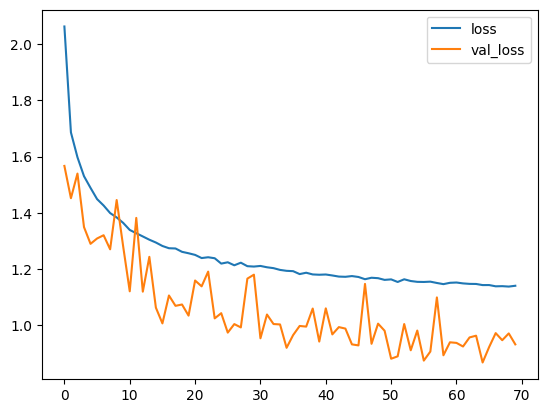

In [ ]:
# Plot loss per iteration
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

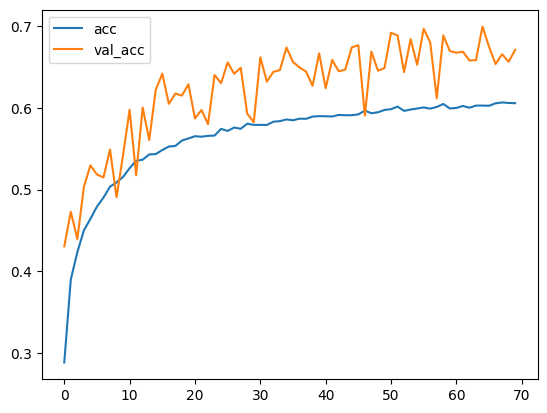

In [ ]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# evaluate model
_ , acc = model.evaluate(testX, testY, verbose=0)
print( ' > %.3f ' % (acc * 100.0))

 > 67.120 


# Save The Model

In [ ]:
# Save our model to a file
# Must save as a .h5 format to be able to download it to your pc
model.save('LeNetGC.h5')

In [ ]:
# Check that the model file exists
!ls -1h